# GRIPFEBRUARY22 

ㅤㅤ

## Data Science InternShip 

ㅤㅤ

### Author : Malepati.Naga Dhana Veneetha






ㅤㅤ

### Project  1 : Prediction Using SuperVised Machine Learning




* Predict the percentage of an student based on the no. of study hours.
* Data can be found at http://bit.ly/w-data
* Find the predicted score if a student studies for 9.25 hrs?
* Perform Evluating The Model

ㅤㅤ

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
mnd = pd.read_csv(url)
print("Data imported successfully")

mnd.head(16)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


ㅤㅤ



Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:




ㅤㅤㅤ

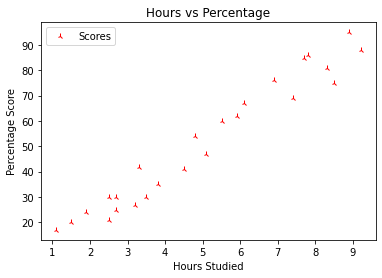

In [3]:
# Plotting the distribution of scores
mnd.plot(x='Hours', y='Scores', style='2', color='red')#plots one specific column against another specific column
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()



From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.




ㅤ



## Preparing the data






The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

ㅤ

In [4]:
X = mnd.iloc[:, :-1].values # All rows and last column 
y = mnd.iloc[:, 1].values  # All rows and 2nd column

In [5]:
print(X)
type(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


numpy.ndarray

In [6]:
print(y)
type(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


numpy.ndarray



Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:




ㅤ

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ㅤ




## Training the Algorithm



We have split our data into training and testing sets, and now is finally the time to train our algorithm.



ㅤ

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

print("Training complete.")

Training complete.


In [9]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


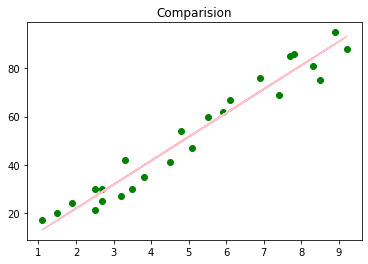

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_  #y = mx + b 

# Plotting for the test data
plt.scatter(X, y, color='green')
plt.plot(X, line, color='pink')
plt.title("Comparision")
plt.show()

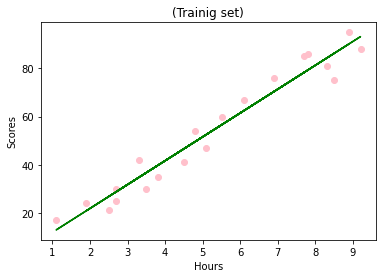

In [11]:
# PLotting the training set
plt.scatter(X_train,y_train, color='pink')
plt.plot(X_train,regressor.predict(X_train),color='green')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

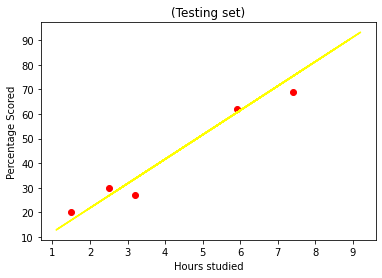

In [12]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'yellow')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

ㅤ




## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.




ㅤ

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
mnd2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
mnd2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



### predicted score if a student studies for 9.25 hrs.


In [15]:
sc_pred = np.array([9.25])
sc_pred = sc_pred.reshape(-1,1)
predict=regressor.predict(sc_pred)
print("No of Hours = {}".format(sc_pred))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


ㅤ




## Evaluating The Model



*The final step to evaluate the performance of algorithm. 
*This step is particularly important to compare how well different algorithm perform on particular dataset.
*For simplicity here, we have choosen the mean square error & mean Absolute error, There are many such metrics.




ㅤ

#### Checking accuracy of our model


In [16]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105356


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


##### You can see that the value of root mean squared error is 4.64,  
##### This means that our algorithm did a satisfactory job.